# company dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
company = pd.read_csv("Company_Data.csv")
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

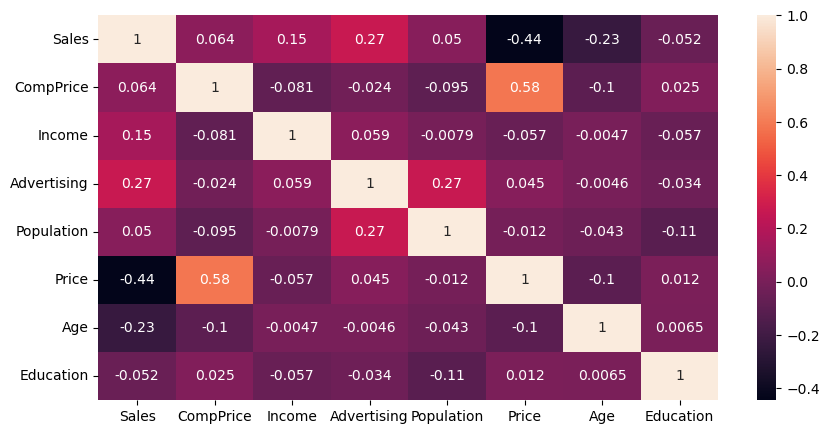

In [6]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(company.corr(),annot=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [14]:
company['status'] = company['Income'].apply(lambda Income: 'Risky' if Income <= 50 else 'Good')
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,9.50,138,73,11,276,120,0,42,17,1,1,Good
1,11.22,111,48,16,260,83,1,65,10,1,1,Risky
2,10.06,113,35,10,269,80,2,59,12,1,1,Risky
3,7.40,117,100,4,466,97,2,55,14,1,1,Good
4,4.15,141,64,3,340,128,0,38,13,1,0,Good
5,10.81,124,113,13,501,72,0,78,16,0,1,Good
6,6.63,115,105,0,45,108,2,71,15,1,0,Good
7,11.85,136,81,15,425,120,1,67,10,1,1,Good
8,6.54,132,110,0,108,124,2,76,10,0,0,Good
9,4.69,132,113,0,131,124,2,76,17,0,1,Good


In [15]:
company.drop(['Income'], axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
company['status'] = label_encoder.fit_transform(company['status'])

In [17]:
x=company.iloc[:,0:5]
y=company['status']
x

,Sales,CompPrice,Advertising,Population,Price
0,9.50,138,11,276,120
1,11.22,111,16,260,83
2,10.06,113,10,269,80
3,7.40,117,4,466,97
4,4.15,141,3,340,128
...,...,...,...,...,...
395,12.57,138,17,203,128
396,6.14,139,3,37,120
397,7.41,162,12,368,159
398,5.94,100,7,284,95


In [18]:
y

0      0
1      1
2      1
3      0
4      0
      ..
395    0
396    1
397    1
398    0
399    1
Name: status, Length: 400, dtype: int32

In [19]:
y.value_counts()

0    277
1    123
Name: status, dtype: int64

In [20]:
#Splitting data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=40)

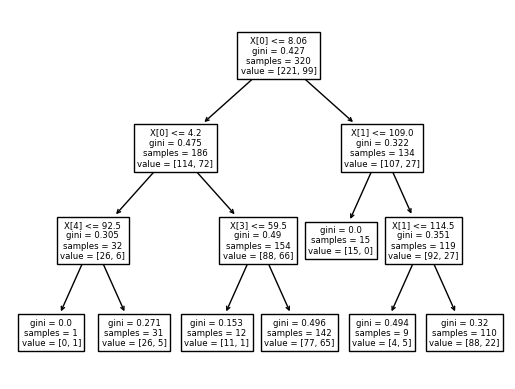

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

#Plot the Decision tree
tree.plot_tree(model);

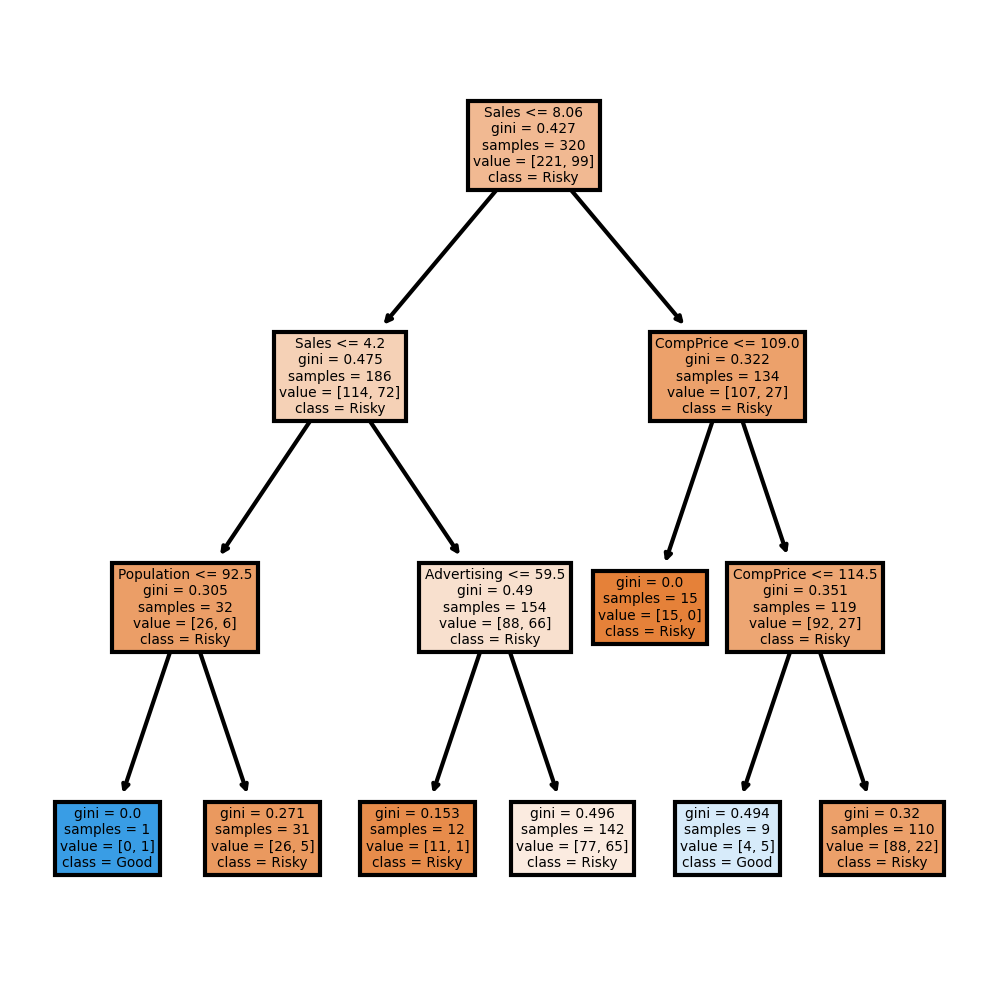

In [22]:
fn = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
pd.crosstab(y_test,preds)

col_0,0,1
status,,
0,53,3
1,23,1


In [25]:
np.mean(preds==y_test)*100

67.5

Classification Report                precision    recall  f1-score   support

           0       0.70      0.95      0.80        56
           1       0.25      0.04      0.07        24

    accuracy                           0.68        80
   macro avg       0.47      0.49      0.44        80
weighted avg       0.56      0.68      0.58        80



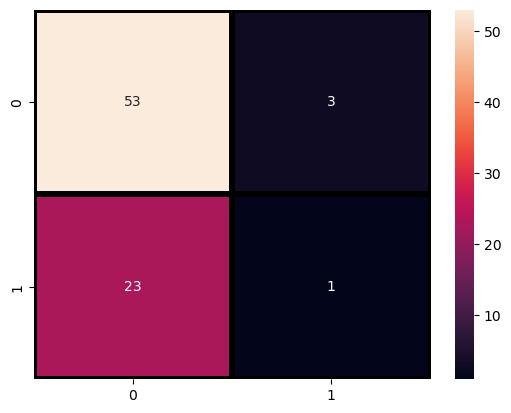

In [26]:
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,preds))